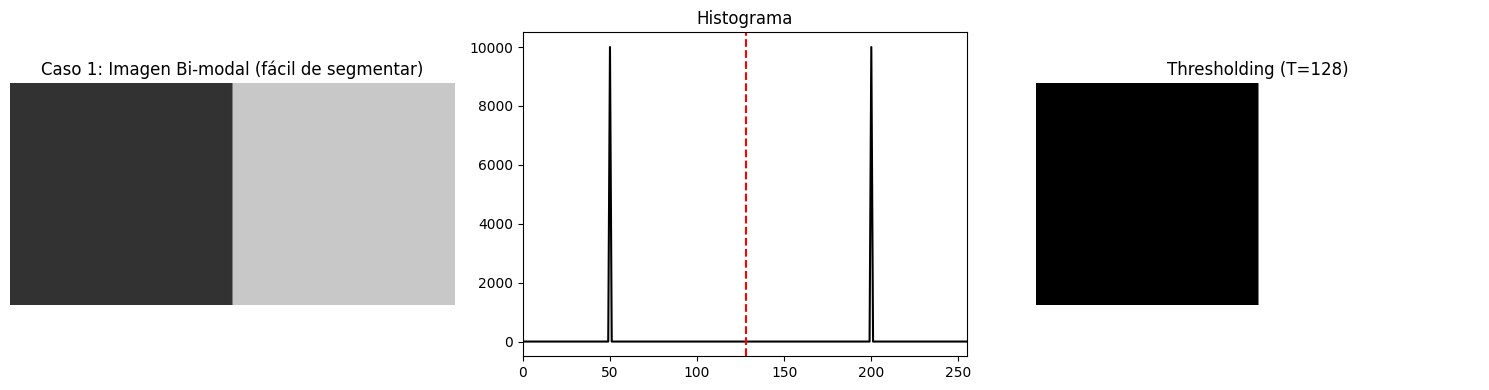

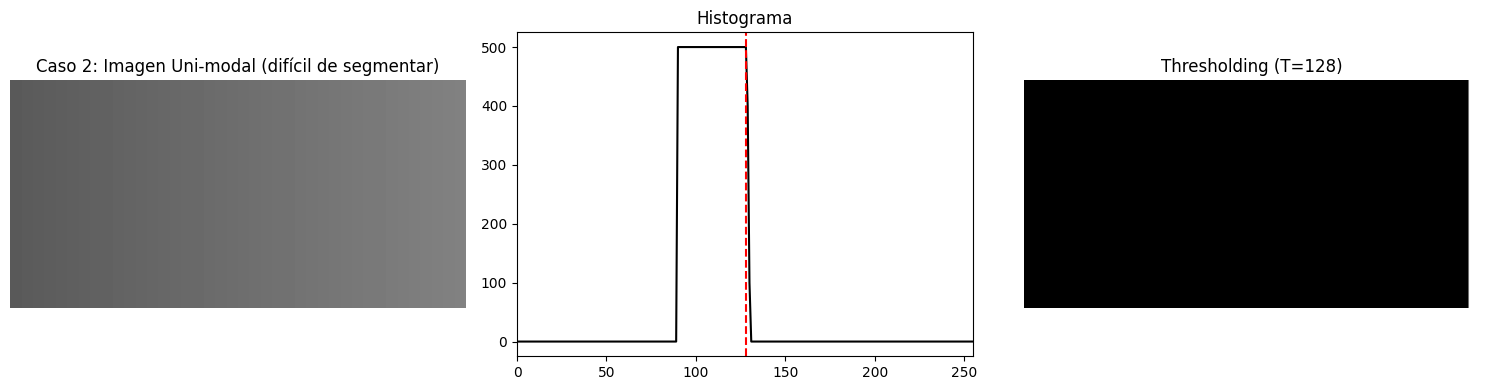

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Generar dos imágenes artificiales

# Caso 1: imagen bi-modal (mitad negra, mitad blanca)
img1 = np.zeros((100, 200), dtype=np.uint8)
img1[:, :100] = 50    # fondo oscuro
img1[:, 100:] = 200   # objeto claro

# Caso 2: imagen con rango medio uniforme (mal para thresholding)
img2 = np.tile(np.linspace(90, 130, 200, dtype=np.uint8), (100, 1))

# Función para mostrar imagen + histograma + threshold
def mostrar(img, titulo):
    hist = np.histogram(img, bins=256, range=(0, 255))[0]
    threshold = 128
    binarizada = (img > threshold).astype(np.uint8) * 255

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titulo)
    axs[0].axis("off")

    axs[1].plot(hist, color='black')
    axs[1].axvline(threshold, color='red', linestyle='--')
    axs[1].set_title("Histograma")
    axs[1].set_xlim(0, 255)

    axs[2].imshow(binarizada, cmap='gray')
    axs[2].set_title("Thresholding (T=128)")
    axs[2].axis("off")
    plt.tight_layout()
    plt.show()

# Mostrar ambos casos
mostrar(img1, "Caso 1: Imagen Bi-modal (fácil de segmentar)")
mostrar(img2, "Caso 2: Imagen Uni-modal (difícil de segmentar)")


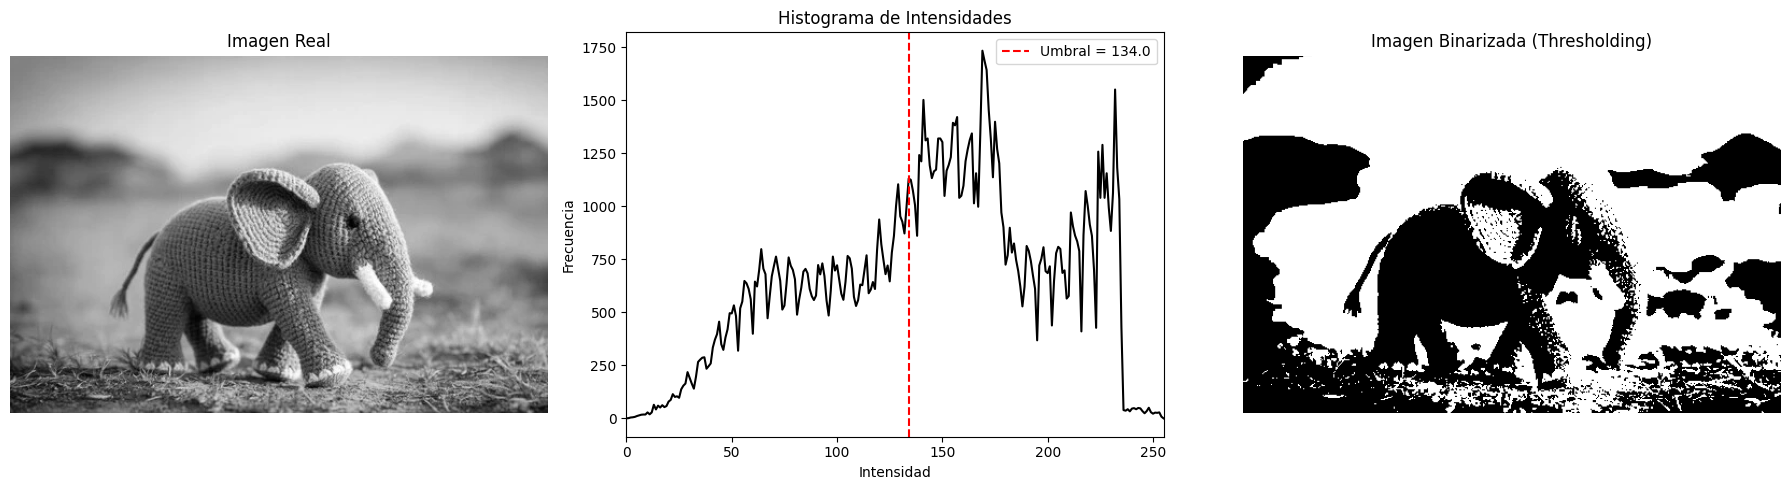

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# 📥 Reemplaza esto con el path a tu imagen
img = Image.open("elefante.webp").convert("L")  # Escala de grises
img_np = np.array(img)

# Calcular histograma
hist = np.histogram(img_np, bins=256, range=(0, 255))[0]

# Aplicar thresholding con umbral fijo
threshold = 128

# Otsu
''' 
In global thresholding, we used an arbitrary chosen value as a threshold. 
In contrast, Otsu's method avoids having to choose a value and determines it automatically.

Otsu's algorithm tries to find a threshold value (t) 
which minimizes the weighted within-class variance
It actually finds a value of t which lies in between
 two peaks such that variances to both classes are minimal
'''

threshold, mat = cv2.threshold(img_np,0,255,
                               cv2.THRESH_BINARY+cv2.THRESH_OTSU)

'''
total_pixels = img_np.size
current_max, threshold = 0, 0
sum_total = np.dot(np.arange(256), hist)
sumB, wB = 0, 0

for t in range(256):
    wB += hist[t]
    if wB == 0:
        continue
    wF = total_pixels - wB
    if wF == 0:
        break
    sumB += t * hist[t]
    mB = sumB / wB
    mF = (sum_total - sumB) / wF
    between_var = wB * wF * (mB - mF)**2
    if between_var > current_max:
        current_max = between_var
        threshold = t

# ------------------------------
# 4. Aplicar umbral de Otsu
# ------------------------------
'''
binary_img = (img_np > threshold).astype(np.uint8) * 255
binary_img = mat

# Visualizar
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(img_np, cmap='gray')
axs[0].set_title("Imagen Real")
axs[0].axis("off")

axs[1].plot(hist, color='black')
axs[1].axvline(threshold, color='red', linestyle='--', label=f"Umbral = {threshold}")
axs[1].set_title("Histograma de Intensidades")
axs[1].legend()
axs[1].set_xlim(0, 255)
axs[1].set_xlabel("Intensidad")
axs[1].set_ylabel("Frecuencia")

axs[2].imshow(binary_img, cmap='gray')
axs[2].set_title("Imagen Binarizada (Thresholding)")
axs[2].axis("off")

plt.tight_layout()
plt.show()


Adaptive Thresholding # https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

(-0.5, 499.5, 332.5, -0.5)

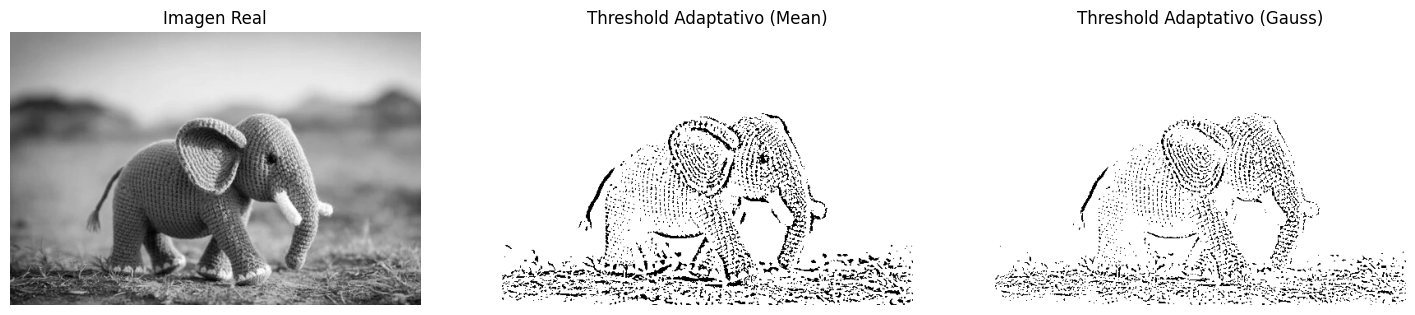

In [ ]:
import cv2

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(img_np, cmap='gray')
axs[0].set_title("Imagen Real")
axs[0].axis("off")

binary_img = cv2.adaptiveThreshold(img_np, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=20)

axs[1].imshow(binary_img, cmap='gray')
axs[1].set_title("Threshold Adaptativo (Mean)")
axs[1].axis("off")


binary_img = cv2.adaptiveThreshold(img_np, 255, 
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY,
                                       blockSize=11, C=20)

axs[2].imshow(binary_img, cmap='gray')
axs[2].set_title("Threshold Adaptativo (Gauss)")
axs[2].axis("off")

Mean

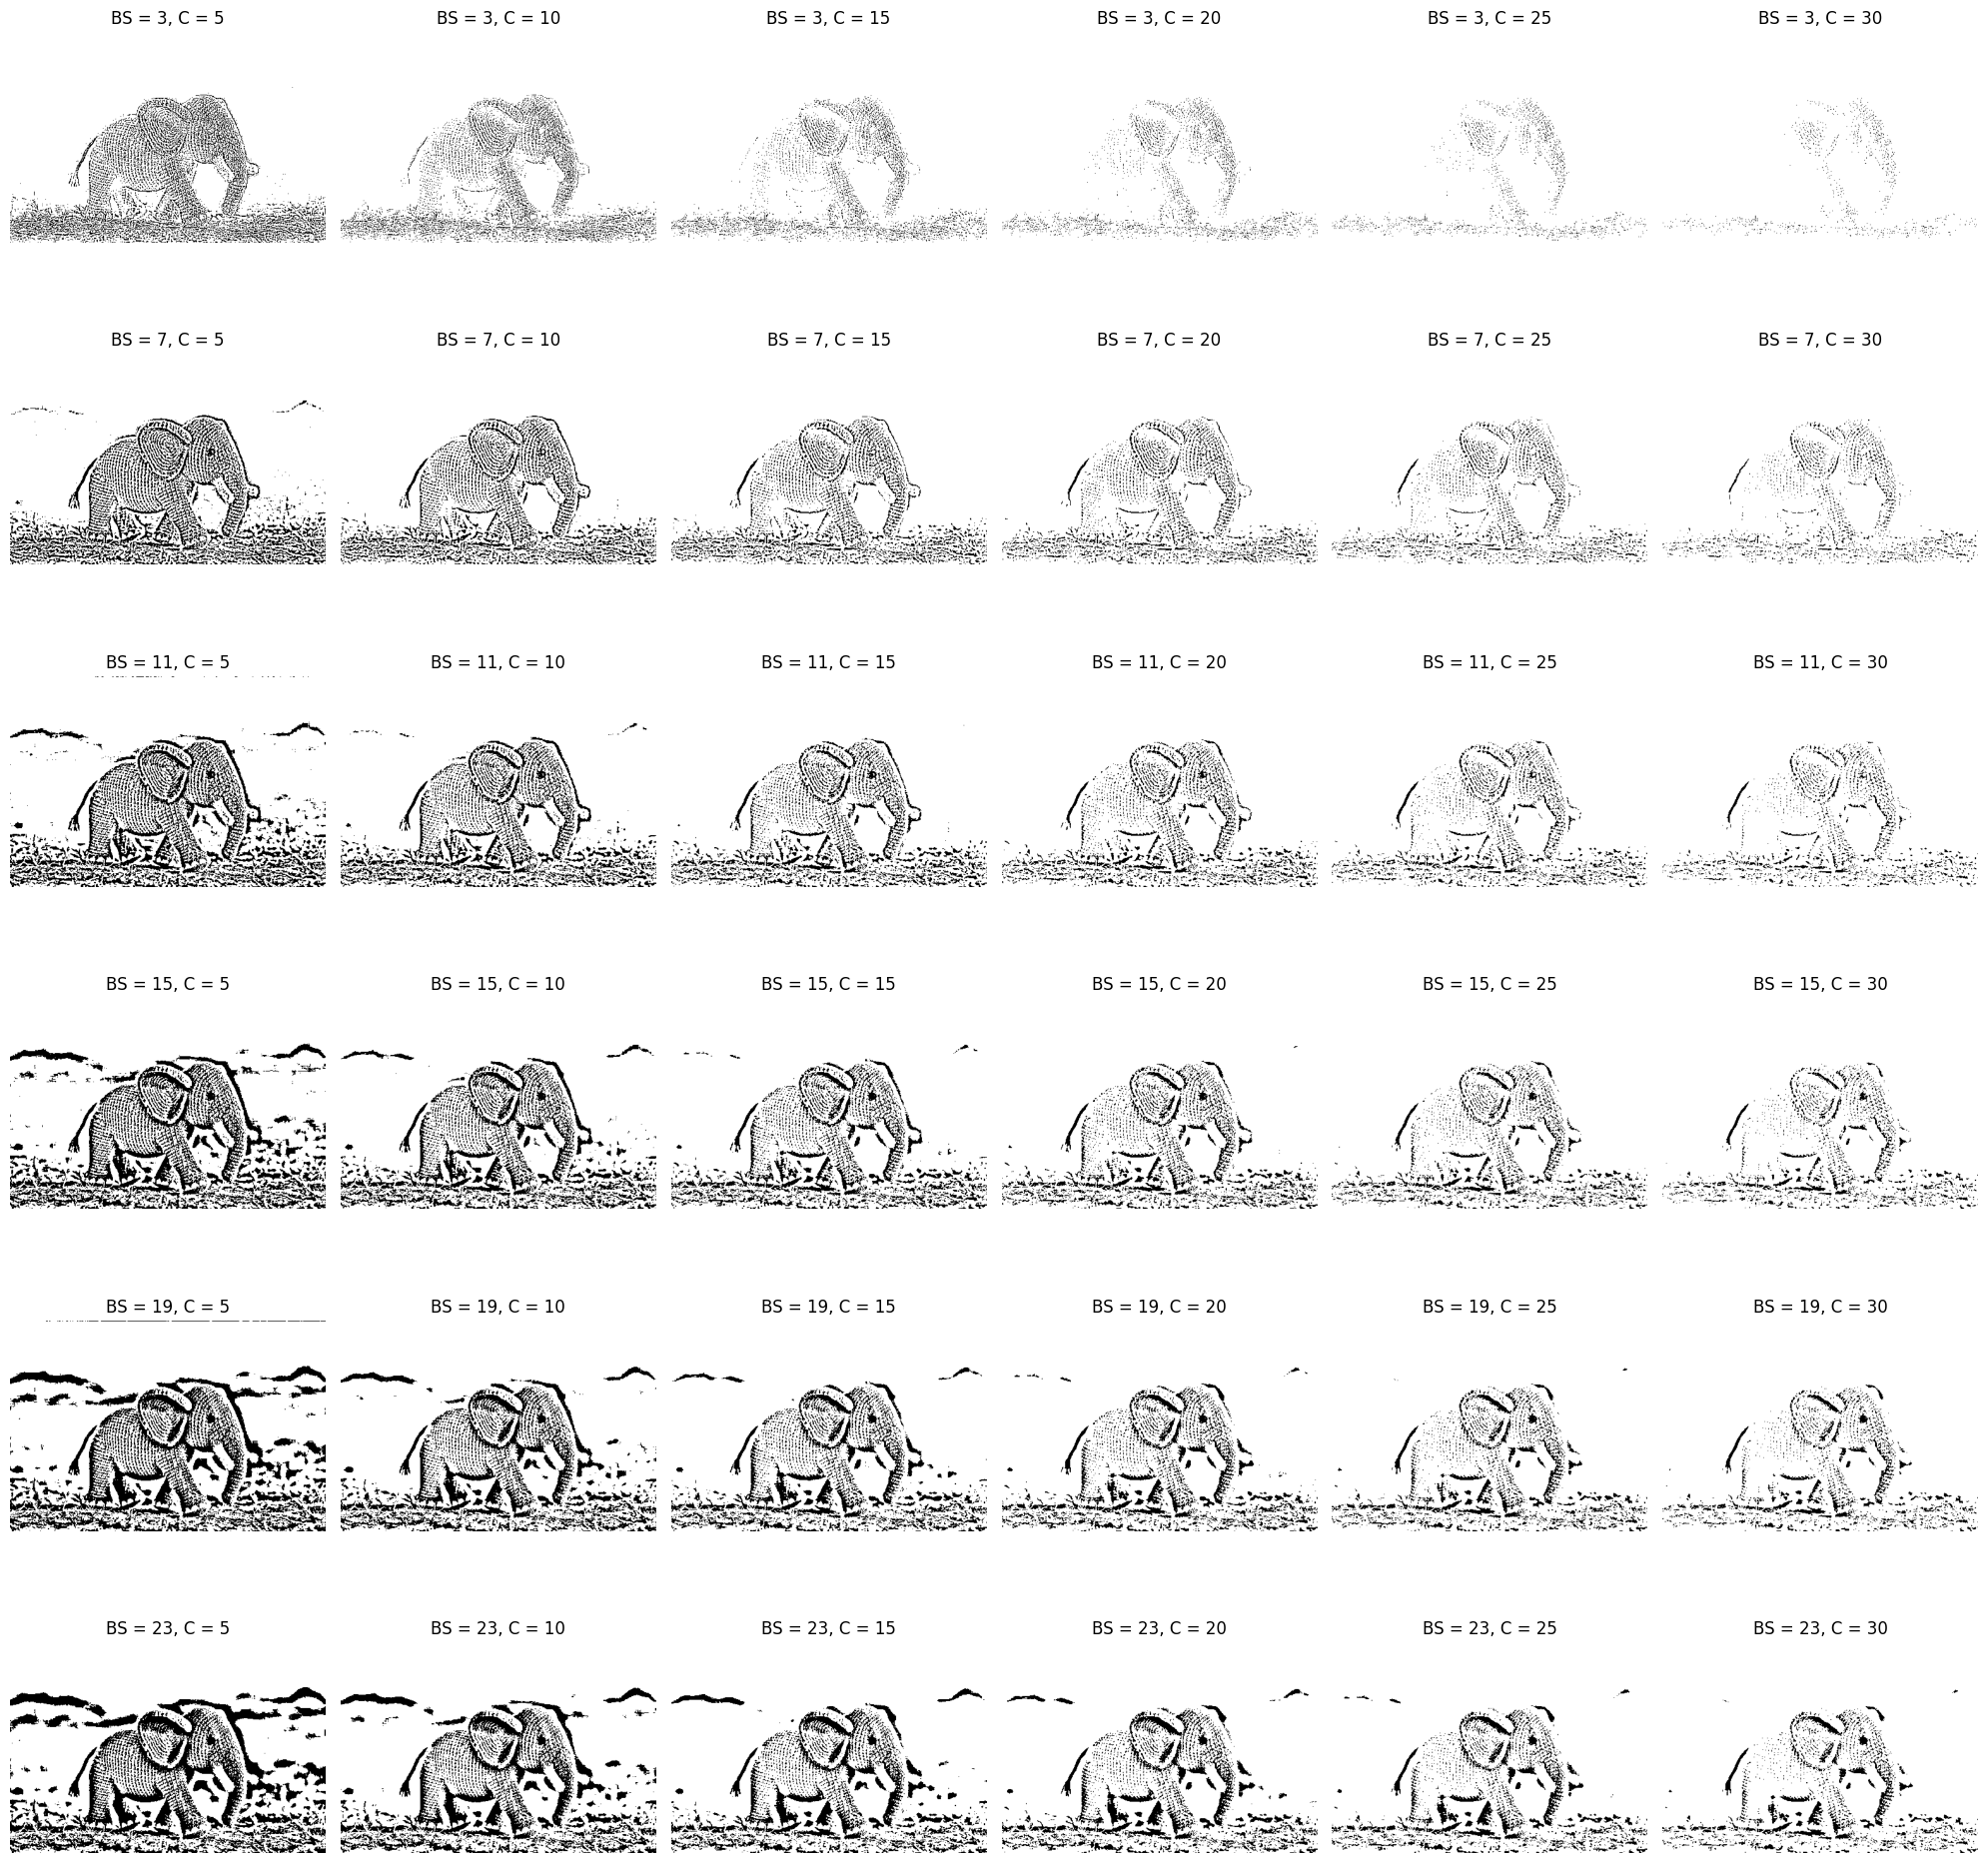

In [30]:
import itertools 
blockSizes = (3, 7, 11, 15, 19, 23)
constantes = (5, 10, 15, 20, 25, 30)

parametros = list(itertools.product(blockSizes, constantes))
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
axs = axs.flatten()

for i, (blockSize, constante) in enumerate(parametros, start=0):
    binary_img = cv2.adaptiveThreshold(img_np, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                       cv2.THRESH_BINARY, blockSize=blockSize, C=constante)
    axs[i].imshow(binary_img, cmap='gray')
    axs[i].set_title(f"BS = {blockSize}, C = {constante}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()
    

Gauss

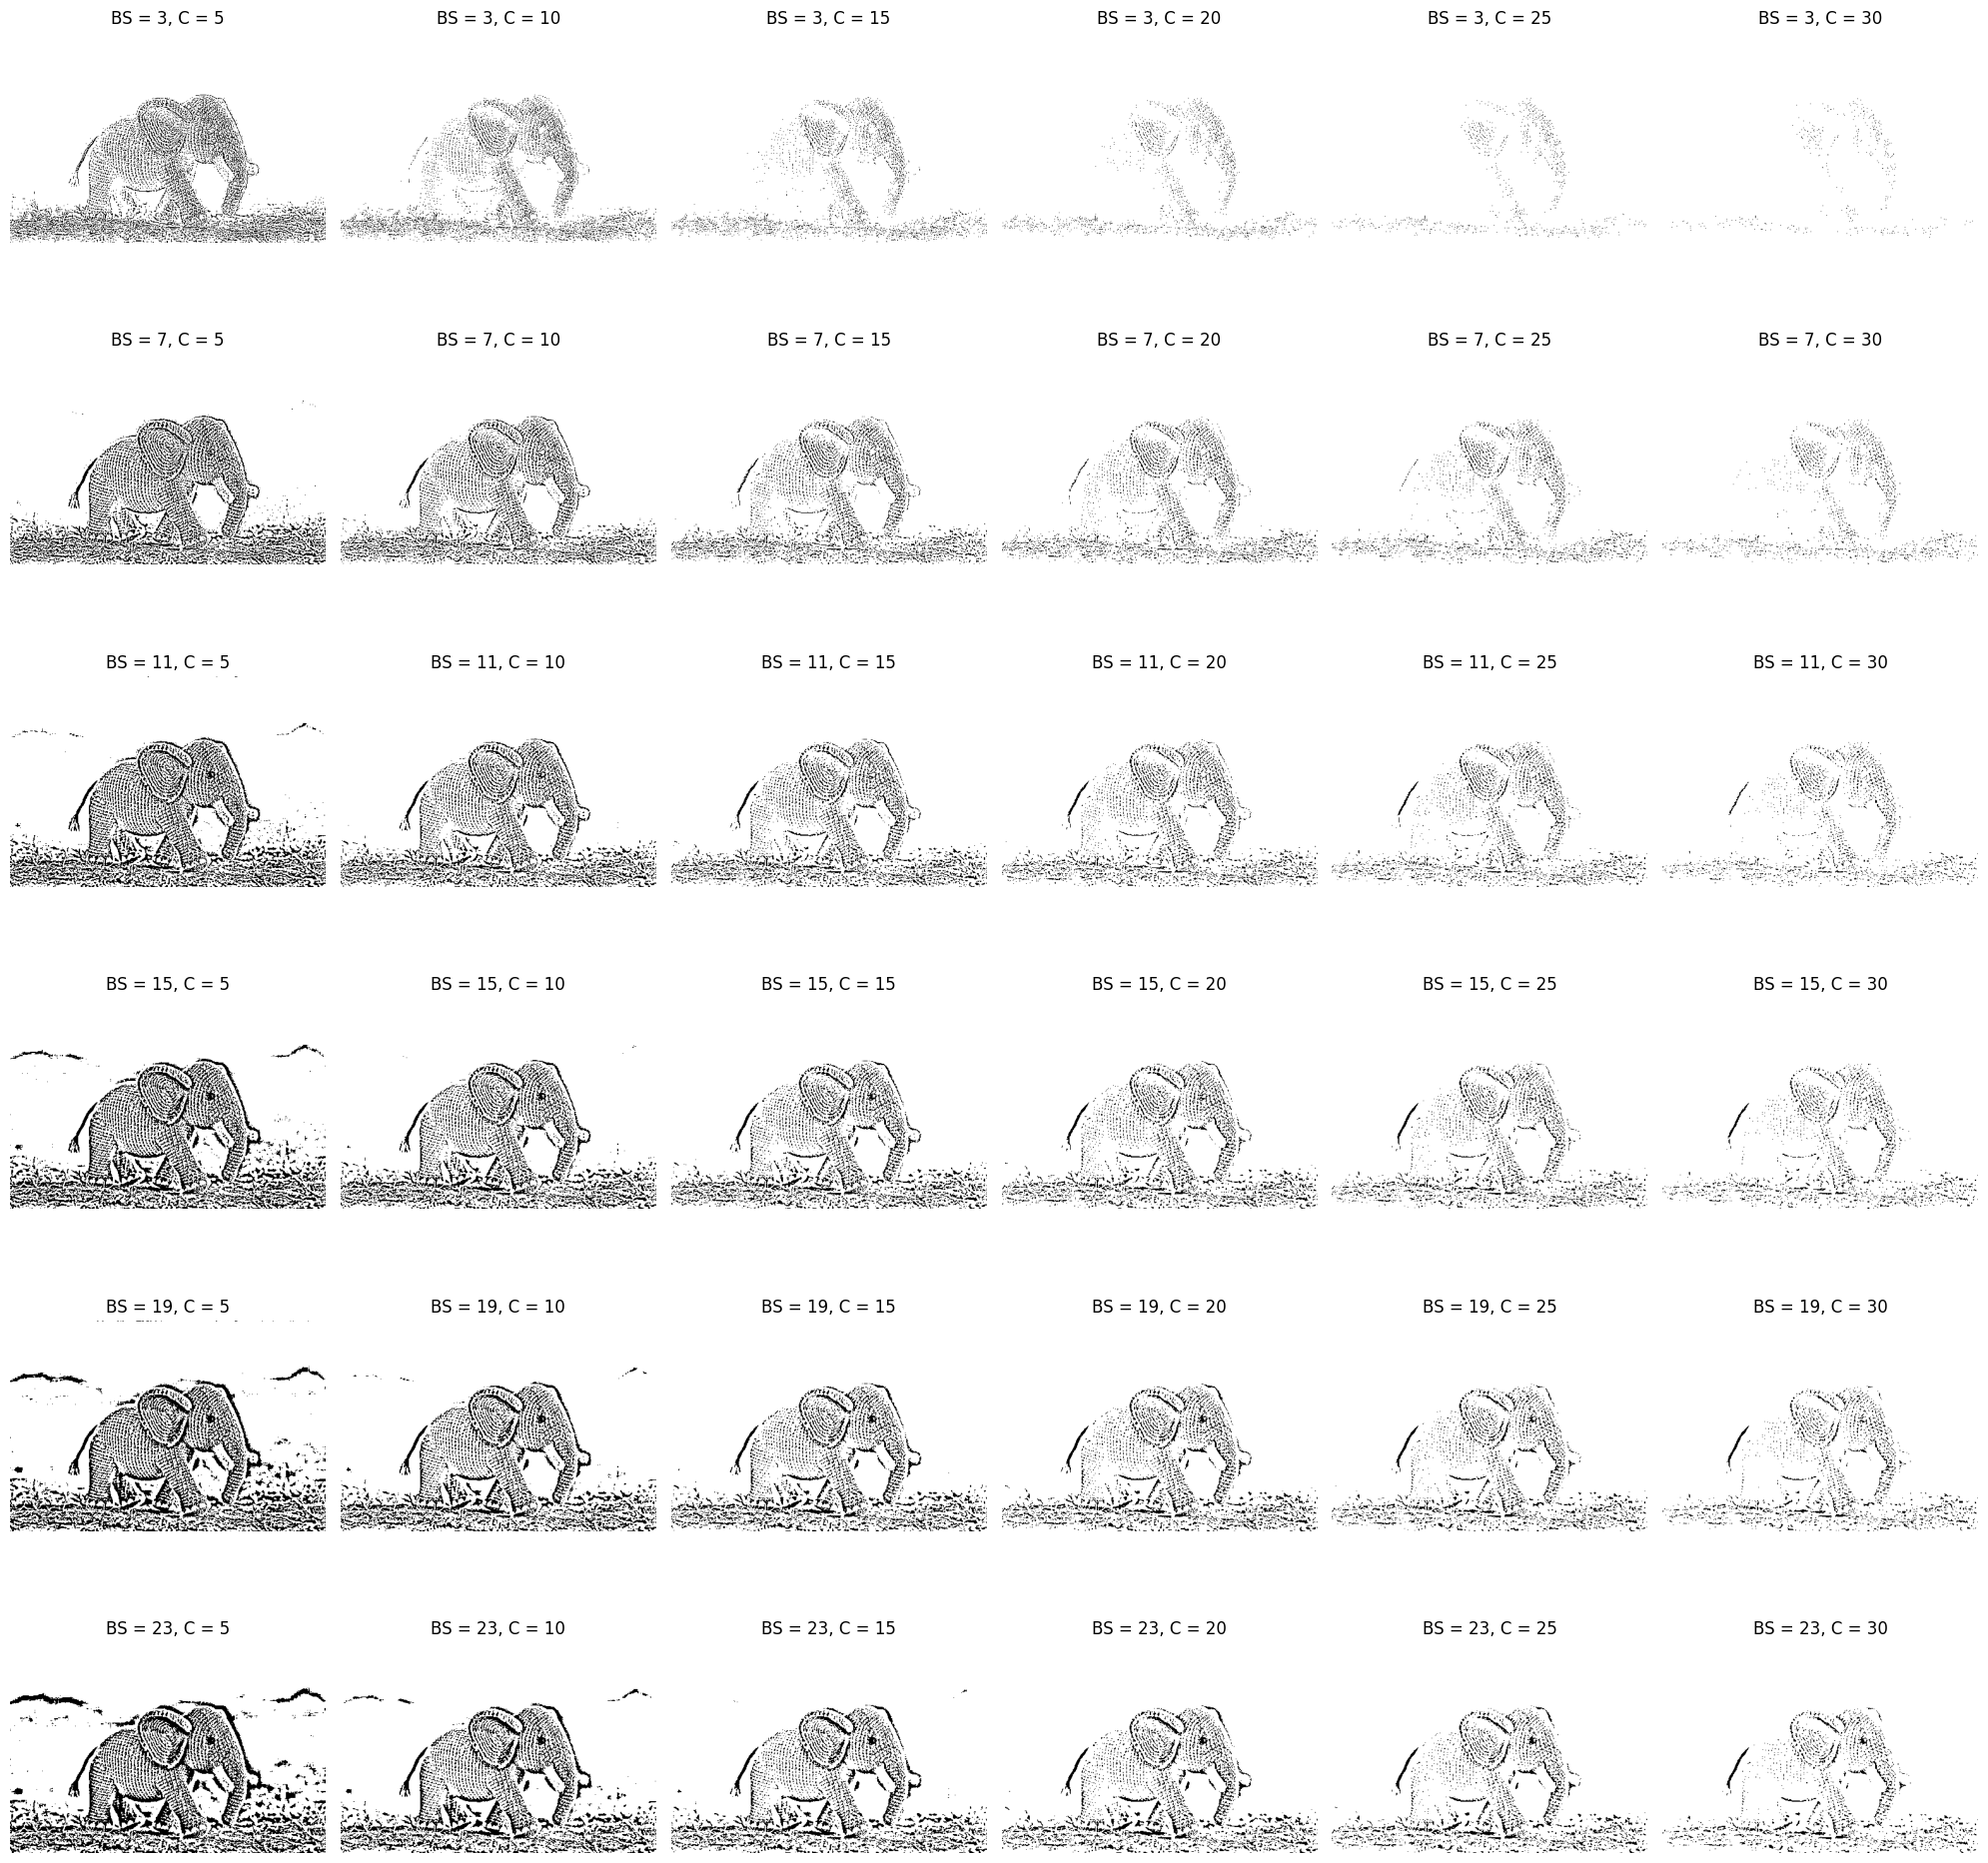

In [31]:
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
axs = axs.flatten()

for i, (blockSize, constante) in enumerate(parametros, start=0):
    binary_img = cv2.adaptiveThreshold(img_np, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, blockSize=blockSize, C=constante)
    axs[i].imshow(binary_img, cmap='gray')
    axs[i].set_title(f"BS = {blockSize}, C = {constante}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

Edge Detection de F. Canny
1. Suaviza la imagen con un filtro Gaussiano
2. Calcula los gradientes en X e Y (como Sobel)
3. Calcula la magnitud y dirección del borde
4. Aplica supresión no máxima (NMS) (afinamiento de bordes)
5. Usa doble umbral para conservar bordes fuertes y conectar los débiles

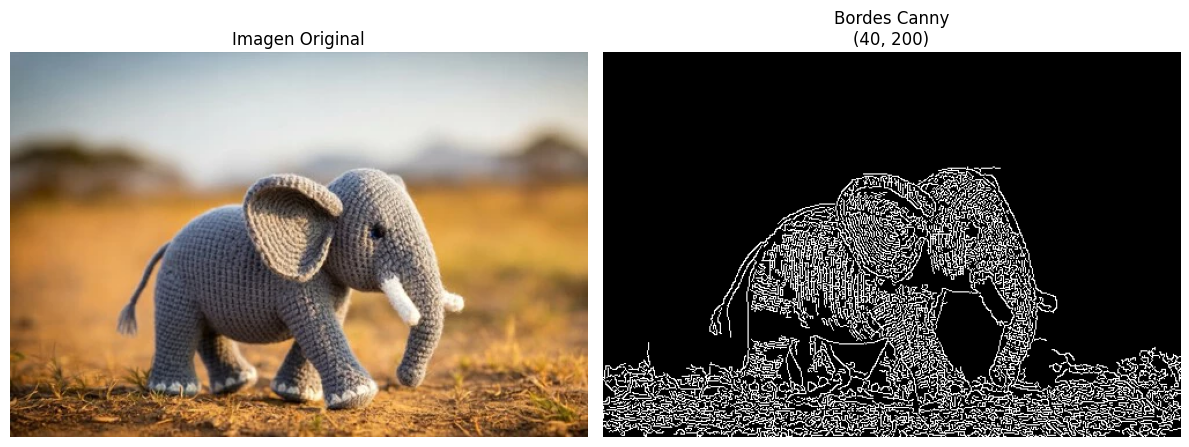

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a escala de grises
img = cv2.imread("elefante.webp")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar Canny
low_threshold = 40
high_threshold = 200
edges = cv2.Canny(gray, low_threshold, high_threshold)

# Mostrar resultado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title(f"Bordes Canny\n({low_threshold}, {high_threshold})")
plt.axis("off")

plt.tight_layout()
plt.show()

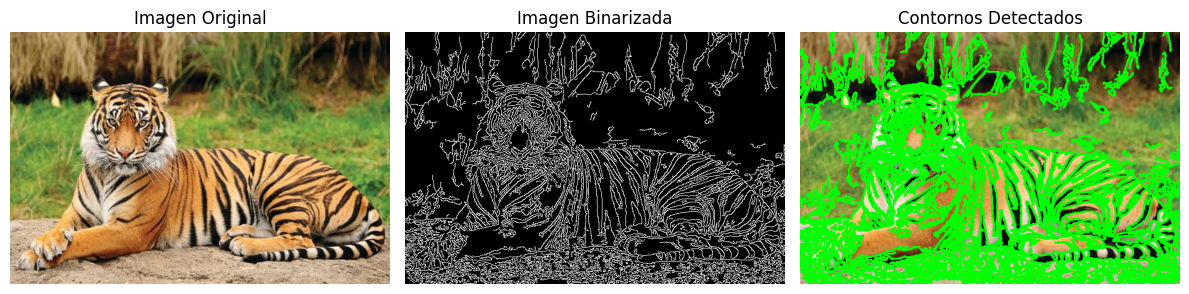

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Cargar imagen y convertir a escala de grises ---
img = cv2.imread("tigre.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- 2. Binarizar la imagen ---
# Puedes usar cv2.Canny(), cv2.threshold(), o cv2.adaptiveThreshold()
thresh = cv2.Canny(gray, low_threshold, high_threshold)

# --- 3. Encontrar contornos ---
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
#max_contour = max(contours, key=cv2.contourArea)

# --- 4. Dibujar los contornos sobre una copia de la imagen original ---
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # color verde, grosor 2
#cv2.drawContours(img_contours, [max_contour], -1, (0, 255, 0), 2)  # color verde, grosor 2
# --- 5. Mostrar resultado ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Imagen Binarizada")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis("off")

plt.tight_layout()
plt.show()


C:\Users\Ramir\AppData\Local\Temp\ipykernel_11136\4067249466.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


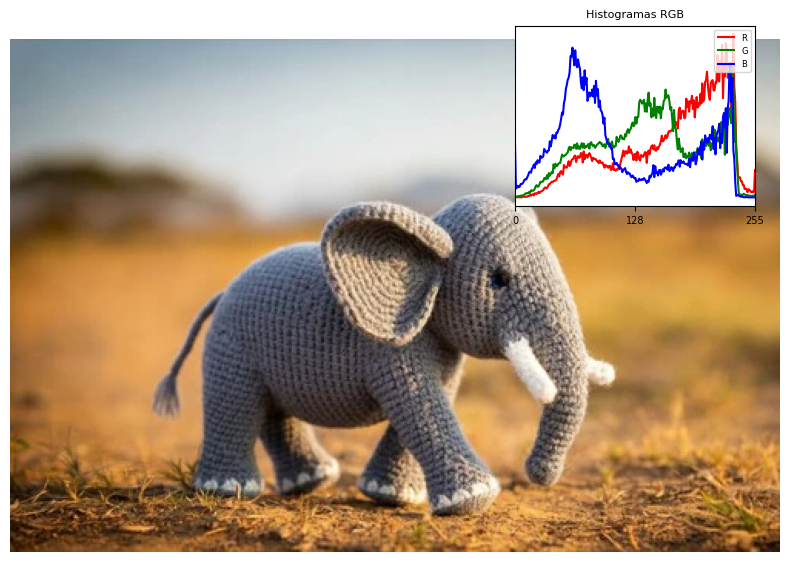

In [34]:
img = Image.open("elefante.webp").convert("RGB")  # Asegura que sea RGB
img_np = np.array(img)

# --- Separar canales ---
r, g, b = img_np[:, :, 0], img_np[:, :, 1], img_np[:, :, 2]
hist_r = np.histogram(r, bins=256, range=(0, 255))[0]
hist_g = np.histogram(g, bins=256, range=(0, 255))[0]
hist_b = np.histogram(b, bins=256, range=(0, 255))[0]

# --- Crear figura principal ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_np)
ax.axis("off")

# --- Crear inset axes para histogramas ---
inset_ax = fig.add_axes([0.65, 0.65, 0.3, 0.3])  # [left, bottom, width, height] en porcentaje

# Graficar los histogramas en el inset
inset_ax.plot(hist_r, color='red', label='R')
inset_ax.plot(hist_g, color='green', label='G')
inset_ax.plot(hist_b, color='blue', label='B')
inset_ax.set_xlim(0, 255)
inset_ax.set_xticks([0, 128, 255])
inset_ax.set_yticks([])
inset_ax.set_title("Histogramas RGB", fontsize=8)
inset_ax.tick_params(axis='both', which='major', labelsize=7)
inset_ax.legend(fontsize=6, loc="upper right")

plt.tight_layout()
plt.show()

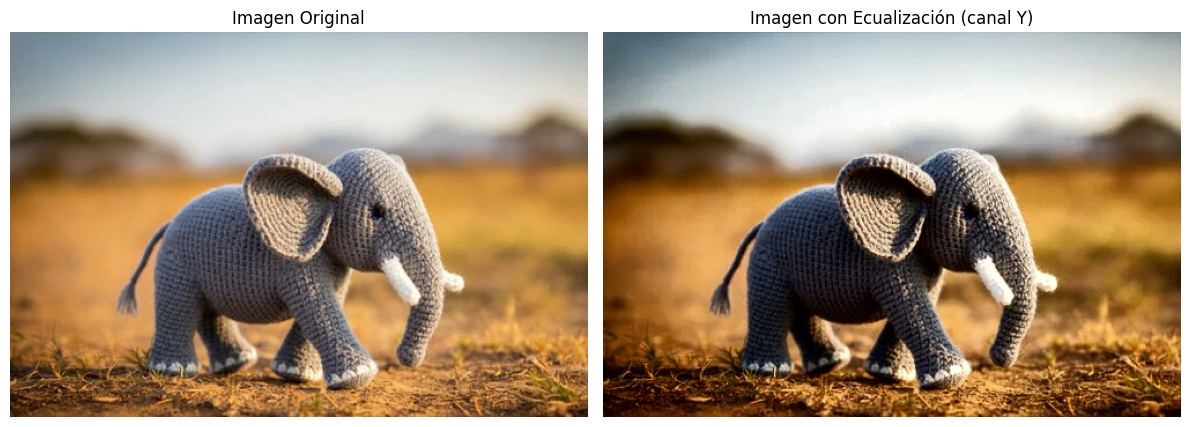

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Cargar imagen en RGB ---
img = Image.open("elefante.webp").convert("RGB")
img_np = np.array(img)

# --- Convertir a YCbCr y separar canales ---
img_ycbcr = img.convert("YCbCr")
y, cb, cr = img_ycbcr.split()
y_np = np.array(y)

# --- Ecualizar canal Y ---
def ecualizar_histograma(canal):
    hist, _ = np.histogram(canal.flatten(), bins=256, range=[0,255])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_normalized = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_normalized, 0).astype(np.uint8)
    return cdf_final[canal]

y_eq = ecualizar_histograma(y_np)

# --- Recomponer imagen YCbCr y convertir a RGB ---
img_ycbcr_eq = Image.merge("YCbCr", (Image.fromarray(y_eq), cb, cr))
img_eq_rgb = img_ycbcr_eq.convert("RGB")

# --- Visualización ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(img)
axs[0].set_title("Imagen Original")
axs[0].axis("off")

axs[1].imshow(img_eq_rgb)
axs[1].set_title("Imagen con Ecualización (canal Y)")
axs[1].axis("off")

plt.tight_layout()
plt.show()


C:\Users\Ramir\AppData\Local\Temp\ipykernel_11136\3131698841.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


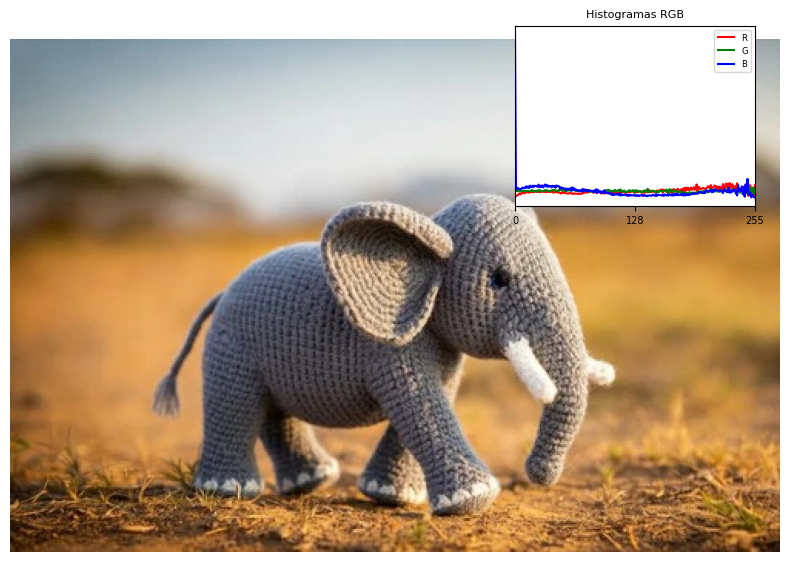

In [36]:
img_eq_rgb = np.array(img_eq_rgb)
r, g, b = img_eq_rgb[:, :, 0], img_eq_rgb[:, :, 1], img_eq_rgb[:, :, 2]
hist_r = np.histogram(r, bins=256, range=(0, 255))[0]
hist_g = np.histogram(g, bins=256, range=(0, 255))[0]
hist_b = np.histogram(b, bins=256, range=(0, 255))[0]

# --- Crear figura principal ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img_np)
ax.axis("off")

# --- Crear inset axes para histogramas ---
inset_ax = fig.add_axes([0.65, 0.65, 0.3, 0.3])  # [left, bottom, width, height] en porcentaje

# Graficar los histogramas en el inset
inset_ax.plot(hist_r, color='red', label='R')
inset_ax.plot(hist_g, color='green', label='G')
inset_ax.plot(hist_b, color='blue', label='B')
inset_ax.set_xlim(0, 255)
inset_ax.set_xticks([0, 128, 255])
inset_ax.set_yticks([])
inset_ax.set_title("Histogramas RGB", fontsize=8)
inset_ax.tick_params(axis='both', which='major', labelsize=7)
inset_ax.legend(fontsize=6, loc="upper right")

plt.tight_layout()
plt.show()